In [73]:
import math
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
%matplotlib inline

In [75]:
# constant values
small = 0.01
large = 0.1

# initialization of tracking DataFrame
df = pd.DataFrame(columns=['actual','perceived'])

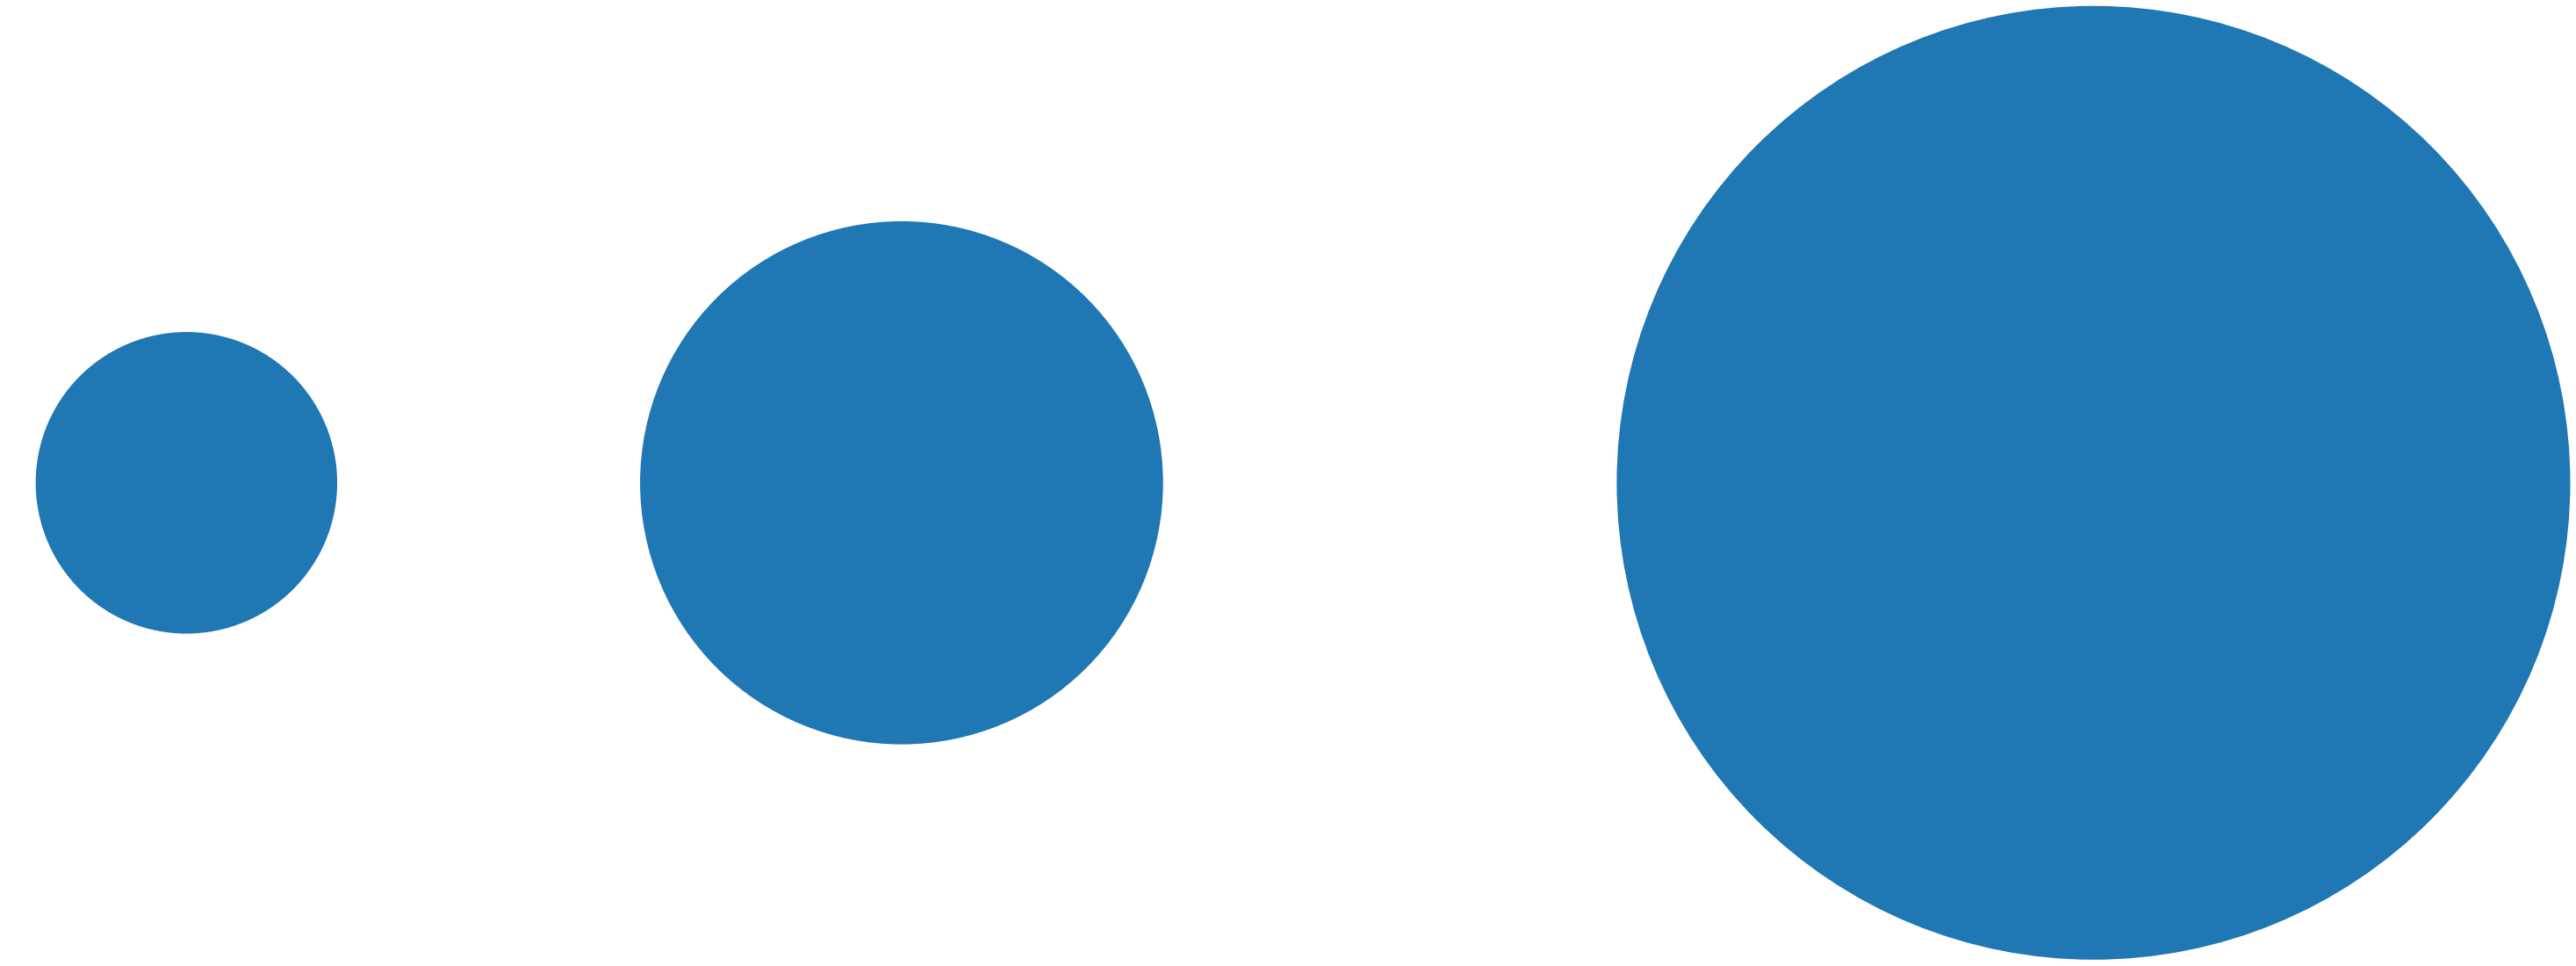

In [94]:
# compute radius of fixed size circles
radiusSmall = math.sqrt(small/math.pi) # area = pi * r * r
radiusLarge = math.sqrt(large/math.pi)

# compute radius of random size circle
unknown = random.uniform(small,large)
radiusUnknown = math.sqrt(unknown/math.pi)

# plot the three circles
plt.axis('equal')
plt.axis('off')
circ1 = plt.Circle( (0,0),               radiusSmall,   clip_on=False )
circ2 = plt.Circle( (4*radiusLarge,0),   radiusLarge,   clip_on=False )
circ3 = plt.Circle( (1.5*radiusLarge,0), radiusUnknown, clip_on=False )

plt.gca().add_artist(circ1)
plt.gca().add_artist(circ2)
plt.gca().add_artist(circ3)

In [95]:
# guess the size of the random circle
guess = eval(input("Guess the size of the middle circle: "))

# save the actual size, and the guess in corresponding arrays
df.loc[len(df)] = [unknown*100.0, guess]

Guess the size of the middle circle: 4


In [96]:
df

,actual,perceived
0,9.429683,10.0
1,7.097954,6.5
2,8.002043,8.0
3,8.056947,8.5
4,6.219676,5.0
5,5.057923,5.0
6,3.008311,4.0


In [97]:
dfs = df.sort_values(by='actual')

In [98]:
dfs

,actual,perceived
6,3.008311,4.0
5,5.057923,5.0
4,6.219676,5.0
1,7.097954,6.5
2,8.002043,8.0
3,8.056947,8.5
0,9.429683,10.0


In [99]:
sortedActual = dfs.actual.values
sortedPerceived = dfs.perceived.values

In [100]:
print("actual:",sortedActual)
print("perceived:", sortedPerceived)

actual: [ 3.00831062  5.0579225   6.21967645  7.09795435  8.00204271  8.05694719
  9.4296834 ]
perceived: [  4.    5.    5.    6.5   8.    8.5  10. ]


In [101]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.power(x, b) + c

x = np.arange(20)  # [0,1,2,3, ..., 19]
y = np.power(x, 2) # [0,1,4,9, ... ]

popt, pcov = curve_fit(func, x, y)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

1.00 x^2.00 + -0.00


In [102]:
popt, pcov = curve_fit(func, sortedActual, sortedPerceived)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

0.01 x^2.80 + 3.63


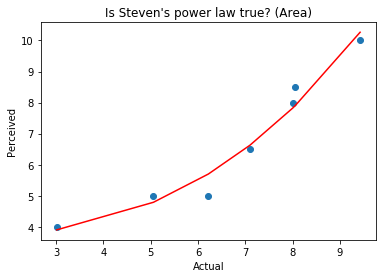

In [103]:
plt.title("Is Steven's power law true? (Area)")
plt.xlabel("Actual")
plt.ylabel("Perceived")
plt.scatter(sortedActual, sortedPerceived)
plt.plot(sortedActual, func(sortedActual, *popt), 'r-', label='fit')